In [1]:
import os 

os.getcwd()

#os.listdir()
#os.listdir('Desktop')

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns


In [2]:
file_path = 'C:\\Users\\PC\\Desktop\\german_credit.csv'

# Datei öffnen
df_credit = pd.read_csv(file_path)

# Die ersten Zeilen der Datei anzeigen
#print(df_credit.head())
df_credit.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
# NaN's suchen.

# Es wurden keine NaN's gefunden.
print(df_credit.isna().sum(),'\n')

# Datentypen der Spalten 

print(df_credit.dtypes,'\n')

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64 

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    

In [4]:
df_credit.describe()


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [5]:
#Datentypen umwandeln

spalten = ['Creditability', 'Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']

for spalte in spalten:
    df_credit[spalte] = df_credit[spalte].astype('category')
    
# Datentypen der Spalten 

#print(df_credit.dtypes,'\n')
    

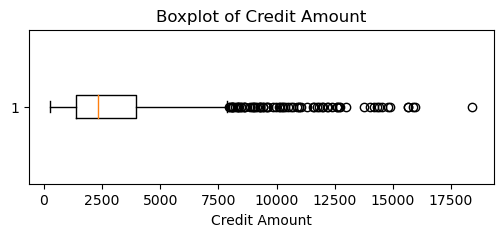

In [6]:
#Verteilung der Kredithöhe anschauen

#  Boxplot
plt.figure(figsize=(6, 2))
plt.boxplot(df_credit['Credit Amount'], vert=False)
plt.title('Boxplot of Credit Amount')
plt.xlabel('Credit Amount')
plt.show()


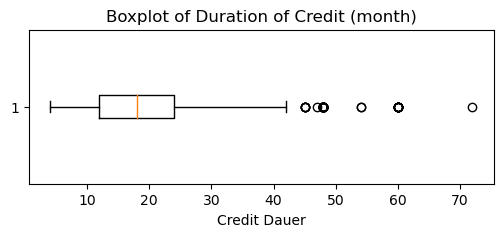

In [7]:
#Verteilung der Kreditdauer anschauen
# Boxplot
plt.figure(figsize=(6, 2))
plt.boxplot(df_credit['Duration of Credit (month)'], vert=False)
plt.title('Boxplot of Duration of Credit (month)')
plt.xlabel('Credit Dauer')
plt.show()

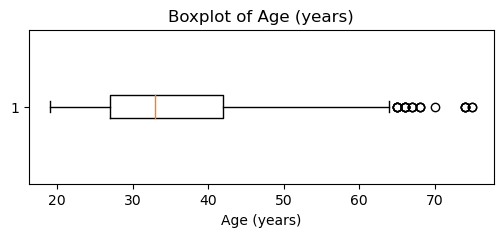

In [8]:
#Verteilung des Alters anschauen
# 
plt.figure(figsize=(6, 2))
plt.boxplot(df_credit['Age (years)'], vert=False)
plt.title('Boxplot of Age (years)')
plt.xlabel('Age (years)')
plt.show()

In [9]:
# Spalte Alter in Gruppen aufgeteilt

bins1 = [0, 25, 40, 55, 100]  # Werte entsprechend  Definition 
labels1 = ['0-25 Jahre Alt', '25-40 Jahre Alt', '40-55 Jahre Alt', '55 + Jahre Alt']
df_credit['Age Group'] = pd.cut(df_credit['Age (years)'], bins=bins1, labels=labels1)
df_credit['Age Group'].value_counts(normalize=True)

Age Group
25-40 Jahre Alt    0.538
40-55 Jahre Alt    0.201
0-25 Jahre Alt     0.190
55 + Jahre Alt     0.071
Name: proportion, dtype: float64

In [10]:
# Spalte Geschlecht zusammengeführt

df_credit['Geschlecht'] = df_credit['Sex & Marital Status'].map({1: 'Mann', 2: 'Mann', 3: 'Mann', 4: 'Frau'})
df_credit['Geschlecht'].value_counts(normalize=True)

Geschlecht
Mann    0.908
Frau    0.092
Name: proportion, dtype: float64

In [11]:
# Spalte Kredithöhe, in Gruppen aufteilen

bins = [0, 1300, 4000, df_credit['Credit Amount'].max()]  #  Werte entsprechend Ihrer Definition von 'klein', 'mittel' und 'groß'
labels = ['Klein 0€-1300€', 'Mittel 1300€-2400€', 'Groß 4000€ +']
df_credit['Credit Amount Group'] = pd.cut(df_credit['Credit Amount'], bins=bins, labels=labels)
df_credit['Credit Amount Group'].value_counts(normalize=True)

Credit Amount Group
Mittel 1300€-2400€    0.531
Groß 4000€ +          0.246
Klein 0€-1300€        0.223
Name: proportion, dtype: float64

In [12]:
# Spalte Kreditdauer, in Gruppen aufteilen
bins = [0, 12, 36, df_credit['Duration of Credit (month)'].max()]  # Grenzen festlegen
labels = ['Kurzfristig 0-12 Monate', 'Mittelfristig 12-36 Monate', 'Langfristig 36 + Monate']  # Labels für die Kategorien
df_credit['Kreditlaufzeit'] = pd.cut(df_credit['Duration of Credit (month)'], bins=bins, labels=labels)
df_credit['Kreditlaufzeit'].value_counts(normalize=True)

Kreditlaufzeit
Mittelfristig 12-36 Monate    0.554
Kurzfristig 0-12 Monate       0.359
Langfristig 36 + Monate       0.087
Name: proportion, dtype: float64

In [13]:
# Spaltenunterkategorien benennen


columns_2 = ['Account Balance', 'Kreditlaufzeit', 'Payment Status of Previous Credit', 
           'Purpose', 'Credit Amount Group', 'Value Savings/Stocks', 'Length of current employment', 
           'Instalment per cent', 'Geschlecht', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 
           'Age Group', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 
           'Telephone', 'Foreign Worker']
#Beschriftung 
df_credit=df_credit.replace({'Account Balance' : { 1 : 'No Account', 2 : 'None',3: 'Below 200 DM',4:'200 DM or Above'}})

#Beschriftung 
df_credit=df_credit.replace({'Payment Status of Previous Credit' : {0:'Delayed',1 : 'Other Credits', 2 : 'Paid Up',
                                                          3: 'No Problem with Current Credits',4:'Previous Credits Paid'}})
#------------------------------
df_credit=df_credit.replace({'Value Savings/Stocks' : {1 : 'None', 2 : 'Below 100 DM',
                                                          3: '[100, 500)',4:'[500, 1000)',5:'Above 1000'}})
#-----------------------
df_credit=df_credit.replace({'Length of current employment' : {1 : 'Unemployed', 2 : '<1 Year',
                                                          3: '[1, 4)',4:'[4, 7)',5:'Above 7'}})
#---------------------
df_credit=df_credit.replace({'Instalment per cent' : {1 : 'Above 35%', 2 : '(25%, 35%)',
                                                          3: '[20%, 25%)',4:'Below 20%'}})
#---------------------------------
df_credit=df_credit.replace({'Occupation' : {1 : 'Unemployed, unskilled', 2 : 'Unskilled Permanent Resident',
                                                          3: 'Skilled',4:'Executive'}})
#----------------------------
#df_credit=df_credit.replace({'Sex_Marital_Status' : {1 : 'Male, Divorced', 2 : 'Male, Single',
#                                                          3: 'Male, Married/Widowed',4:'Female'}})
#----------------------------------
df_credit=df_credit.replace({'Duration in Current address' : {1 : '<1 Year', 2 : '[1, 4)',
                                                          3: '[4, 7)',4:'Above 7'}})
#---------------------------------
df_credit=df_credit.replace({'Type of apartment' : {1 : 'Free', 2 : 'Rented',
                                                          3: 'Owned'}})
#----------------------------------------
df_credit=df_credit.replace({'Most valuable available asset' : {1 : 'None', 2 : 'Car',
                                                          3: 'Life Insurance',4:'Real Estate'}})
#---------------------------------
df_credit=df_credit.replace({'No of Credits at this Bank' : {1 : '1', 2 : '2 or 3',
                                                          3: '4 or 5',4:'Above 6'}})
#--------------------------------------
df_credit=df_credit.replace({'Guarantors' : {1 : 'None', 2 : 'Co-applicant',
                                                          3: 'Guarantor'}})
#------------------------------------
df_credit=df_credit.replace({'Concurrent Credits' : {1 : 'Other Banks', 2 : 'Dept. Store',
                                                          3: 'None'}})
#-------------------------------
df_credit=df_credit.replace({'No of dependents' : {1 : '3 or More', 2 : 'Less than 3'}})
#------------------------------------
df_credit=df_credit.replace({'Telephone' : {1 : 'No', 2 : 'Yes'}})

#------------------------------------------
df_credit=df_credit.replace({'Foreign Worker' : {1 : 'No', 2 : 'Yes'}})

#------------------------------------------------
df_credit=df_credit.replace({'Purpose' : {0:'Other',1 : 'New Car', 2 : 'Used Car',
                               3:'Furniture',4:'Radio/TV',5:'Appliances',
                               6:'Repair',8:'Vacation',9:'Retraining',10:'Business'}})


#-------------------------------
############################################################
# Für die Visualisierungen :
df_credit=df_credit.replace({'Purpose' : {'Other':'Andere','New Car' : 'Neuwagen', 'Used Car' : 'Gebrauchtwagen',
                               'Furniture':'Möbel','Radio/TV':'Radio/TV','Appliances':'Haushaltsgeräte',
                               'Repair':'Reparatur','Vacation':'Urlaub','Retraining':'Umschulung','Business':'Geschäft'}})

df_credit.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Age Group,Geschlecht,Credit Amount Group,Kreditlaufzeit
0,1,No Account,18,Previous Credits Paid,Gebrauchtwagen,1049,None,<1 Year,Below 20%,2,...,Free,1,Skilled,3 or More,No,No,0-25 Jahre Alt,Mann,Klein 0€-1300€,Mittelfristig 12-36 Monate
1,1,No Account,9,Previous Credits Paid,Andere,2799,None,"[1, 4)","(25%, 35%)",3,...,Free,2 or 3,Skilled,Less than 3,No,No,25-40 Jahre Alt,Mann,Mittel 1300€-2400€,Kurzfristig 0-12 Monate
2,1,None,12,Paid Up,Umschulung,841,Below 100 DM,"[4, 7)","(25%, 35%)",2,...,Free,1,Unskilled Permanent Resident,3 or More,No,No,0-25 Jahre Alt,Mann,Klein 0€-1300€,Kurzfristig 0-12 Monate
3,1,No Account,12,Previous Credits Paid,Andere,2122,None,"[1, 4)","[20%, 25%)",3,...,Free,2 or 3,Unskilled Permanent Resident,Less than 3,No,Yes,25-40 Jahre Alt,Mann,Mittel 1300€-2400€,Kurzfristig 0-12 Monate
4,1,No Account,12,Previous Credits Paid,Andere,2171,None,"[1, 4)",Below 20%,3,...,Rented,2 or 3,Unskilled Permanent Resident,3 or More,No,Yes,25-40 Jahre Alt,Mann,Mittel 1300€-2400€,Kurzfristig 0-12 Monate


In [14]:
####    Relative Häufigkeit der Kategorien 

columns = ['Creditability','Account Balance', 'Kreditlaufzeit', 'Payment Status of Previous Credit', 
           'Purpose', 'Credit Amount Group', 'Value Savings/Stocks', 'Length of current employment', 
           'Instalment per cent', 'Geschlecht', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 
           'Age Group', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 
           'Telephone', 'Foreign Worker']

for column in columns:
    print(f"\nRelative Häufigkeit der Kategorien in '{column}':")
    print(df_credit[column].value_counts(normalize=True)) #Relative Häufigkeit der Kategorien
    #print(df_credit[column].median())  # median der spalten


Relative Häufigkeit der Kategorien in 'Creditability':
Creditability
1    0.7
0    0.3
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Account Balance':
Account Balance
200 DM or Above    0.394
No Account         0.274
None               0.269
Below 200 DM       0.063
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Kreditlaufzeit':
Kreditlaufzeit
Mittelfristig 12-36 Monate    0.554
Kurzfristig 0-12 Monate       0.359
Langfristig 36 + Monate       0.087
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Payment Status of Previous Credit':
Payment Status of Previous Credit
Paid Up                            0.530
Previous Credits Paid              0.293
No Problem with Current Credits    0.088
Other Credits                      0.049
Delayed                            0.040
Name: proportion, dtype: float64

Relative Häufigkeit der Kategorien in 'Purpose':
Purpose
Möbel              0.280
Andere             0.234
Geb

In [15]:
#  Kategorien nach Kreditglaubwürdigkeit

columns = ['Account Balance', 'Kreditlaufzeit', 'Payment Status of Previous Credit', 
           'Purpose', 'Credit Amount Group', 'Value Savings/Stocks', 'Length of current employment', 
           'Instalment per cent', 'Geschlecht', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 
           'Age Group', 'Concurrent Credits', 'Type of apartment', 
           'No of Credits at this Bank', 'Occupation', 'No of dependents', 
           'Telephone', 'Foreign Worker']

crosstab_dict = {}

for column in columns:
    crosstab_dict[column] = pd.crosstab(index=df_credit[column], columns=[df_credit['Creditability']], normalize='index')
    print(f"\nCrosstab for {column}:\n")
    print(crosstab_dict[column])


Crosstab for Account Balance:

Creditability           0         1
Account Balance                    
No Account       0.492701  0.507299
None             0.390335  0.609665
Below 200 DM     0.222222  0.777778
200 DM or Above  0.116751  0.883249

Crosstab for Kreditlaufzeit:

Creditability                      0         1
Kreditlaufzeit                                
Kurzfristig 0-12 Monate     0.211699  0.788301
Mittelfristig 12-36 Monate  0.323105  0.676895
Langfristig 36 + Monate     0.517241  0.482759

Crosstab for Payment Status of Previous Credit:

Creditability                             0         1
Payment Status of Previous Credit                    
Delayed                            0.625000  0.375000
Other Credits                      0.571429  0.428571
Paid Up                            0.318868  0.681132
No Problem with Current Credits    0.318182  0.681818
Previous Credits Paid              0.170648  0.829352

Crosstab for Purpose:

Creditability           0         

In [16]:
# Kreditzweck nach Mann und Frau
##########################################################

df_frau = df_credit[df_credit['Geschlecht'] == 'Frau']
df_mann = df_credit[df_credit['Geschlecht'] == 'Mann']
# Create a cross-tabulation of the 'Purpose' column
purpose_f = pd.crosstab(index=df_frau['Purpose'], columns='count',normalize='columns')*100

print(purpose_f)

purpose_m = pd.crosstab(index=df_mann['Purpose'], columns='count',normalize='columns')*100


print(purpose_m)

gesch = pd.crosstab(index=df_credit['Purpose'],columns=[df_credit['Geschlecht' ]],normalize='index')*100




col_0                count
Purpose                   
Andere           21.739130
Neuwagen          6.521739
Gebrauchtwagen    7.608696
Möbel            45.652174
Radio/TV          1.086957
Haushaltsgeräte   3.260870
Reparatur         1.086957
Urlaub            3.260870
Umschulung        9.782609
col_0                count
Purpose                   
Andere           23.568282
Neuwagen         10.682819
Gebrauchtwagen   19.162996
Möbel            26.211454
Radio/TV          1.211454
Haushaltsgeräte   2.092511
Reparatur         5.396476
Urlaub            0.660793
Umschulung        9.691630
Geschäft          1.321586


In [17]:
# Kreditvolumen Mann Frau ZWECK

# Erstelle eine Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Berechne die Prozentsätze
percentagegesch = cross_tab / cross_tab.sum() * 100

percentagegesch

Geschlecht,Frau,Mann
Purpose,,
Andere,17.344705,22.188652
Neuwagen,15.123014,17.017941
Gebrauchtwagen,8.377172,17.494287
Möbel,42.872097,19.975978
Radio/TV,0.646687,0.543584
Haushaltsgeräte,1.395398,1.861528
Reparatur,1.971943,5.037498
Urlaub,1.157341,0.281376
Umschulung,11.111642,12.403886


In [18]:
# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegesch2 = cross_tab / cross_tab.sum() * 100
percentagegesch2

Geschlecht,Frau,Mann
Kreditlaufzeit,,
Kurzfristig 0-12 Monate,24.051756,19.624347
Mittelfristig 12-36 Monate,65.448217,59.441211
Langfristig 36 + Monate,10.500027,20.934442


In [19]:
# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegesch3 = cross_tab / cross_tab.sum() * 100
percentagegesch3

Geschlecht,Frau,Mann
Credit Amount Group,,
Klein 0€-1300€,15.917955,5.878774
Mittel 1300€-2400€,50.792816,37.979110
Groß 4000€ +,33.289229,56.142116


In [20]:
# Kreditvolumen Altersgruppe ZWECK

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschag1 = cross_tab / cross_tab.sum() * 100

percentagegeschag1

Age Group,0-25 Jahre Alt,25-40 Jahre Alt,40-55 Jahre Alt,55 + Jahre Alt
Purpose,,,,
Andere,18.243678,20.602123,24.124749,33.887199
Neuwagen,12.977725,16.986059,19.577042,18.128518
Gebrauchtwagen,23.428670,16.553120,17.633334,3.033326
Möbel,28.941009,21.830449,17.379217,10.346073
Radio/TV,0.723039,0.463405,0.629467,0.549349
Haushaltsgeräte,1.436615,1.242716,3.087456,3.604025
Reparatur,4.337533,4.415162,6.364578,5.160104
Urlaub,0.158066,0.540302,0.049997,0.000000
Umschulung,9.753666,13.715524,8.643814,18.501731


In [21]:
# Kreditvolumen Altersgruppe Kredithöhe

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschag2 = cross_tab / cross_tab.sum() * 100

percentagegeschag2

Age Group,0-25 Jahre Alt,25-40 Jahre Alt,40-55 Jahre Alt,55 + Jahre Alt
Credit Amount Group,,,,
Klein 0€-1300€,9.123679,5.488290,5.996454,8.557610
Mittel 1300€-2400€,40.750061,40.807170,34.308309,30.949947
Groß 4000€ +,50.126260,53.704541,59.695237,60.492443


In [22]:
# Kreditdauer Altersgruppe Kredithöhe

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschag3 = cross_tab / cross_tab.sum() * 100

percentagegeschag3

Age Group,0-25 Jahre Alt,25-40 Jahre Alt,40-55 Jahre Alt,55 + Jahre Alt
Kreditlaufzeit,,,,
Kurzfristig 0-12 Monate,19.832226,17.604775,22.792662,28.489372
Mittelfristig 12-36 Monate,57.821560,63.405857,58.362707,41.921326
Langfristig 36 + Monate,22.346214,18.989368,18.844630,29.589302


In [23]:
# Kreditvolumen Gastarbeiter ZWECK

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschga1 = cross_tab / cross_tab.sum() * 100

percentagegeschga1

Foreign Worker,No,Yes
Purpose,,
Andere,21.110385,46.091474
Neuwagen,17.308729,4.818207
Gebrauchtwagen,16.768834,23.047170
Möbel,21.758600,7.217283
Radio/TV,0.567686,0.000000
Haushaltsgeräte,1.854705,1.230099
Reparatur,5.021884,0.000000
Urlaub,0.342740,0.000000
Umschulung,12.737242,0.000000


In [24]:
# Kreditvolumen Gastarbeiter kredithöhe:

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschga2 = cross_tab / cross_tab.sum() * 100

percentagegeschga2

Foreign Worker,No,Yes
Credit Amount Group,,
Klein 0€-1300€,6.363126,9.274452
Mittel 1300€-2400€,38.288877,51.641247
Groß 4000€ +,55.347996,39.084302


In [25]:
# Kreditvolumen Gastarbeiter Kredithöhe:

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentagegeschga31 = cross_tab / cross_tab.sum() * 100

percentagegeschga31


Foreign Worker,No,Yes
Kreditlaufzeit,,
Kurzfristig 0-12 Monate,19.012481,46.085744
Mittelfristig 12-36 Monate,60.562803,36.318489
Langfristig 36 + Monate,20.424716,17.595767


In [26]:
# Kreuztabelle für die Summe der Kreditbeträge
cross_tab35 = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')

# Kreuztabelle für die Anzahl der Kredite
cross_tab36 = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Foreign Worker'])

# Benenne die Spalten um, um die Metriken zu kennzeichnen
cross_tab35.columns = pd.MultiIndex.from_product([cross_tab35.columns, ['Summe']])
cross_tab36.columns = pd.MultiIndex.from_product([cross_tab36.columns, ['Anzahl']])

# Kombinieren beide Kreuztabellen
cross_tab_kombiniert = pd.concat([cross_tab35, cross_tab36], axis=1)

# Berechnen die Prozentsätze
percentagegeschga = cross_tab_kombiniert / cross_tab_kombiniert.sum() * 100
percentagegeschga

Foreign Worker,No,Yes,No,Yes
,Summe,Summe,Anzahl,Anzahl
Kreditlaufzeit,,,,
Kurzfristig 0-12 Monate,19.012481,46.085744,34.579439,70.270270
Mittelfristig 12-36 Monate,60.562803,36.318489,56.490135,27.027027
Langfristig 36 + Monate,20.424716,17.595767,8.930426,2.702703


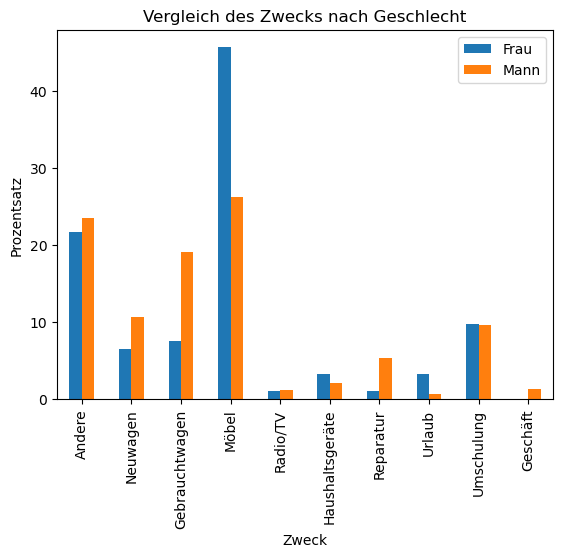

In [27]:
# Erstelle einen DataFrame, der beide DataFrames zusammenfasst
dfz = pd.concat([purpose_f, purpose_m], axis=1)
dfz.columns = ['Frau', 'Mann']

# Erstelle das gruppierte Balkendiagramm
dfz.plot(kind='bar', stacked=False)

# Beschriften der Achsen und  Diagramm  Titel
plt.xlabel('Zweck')
plt.ylabel('Prozentsatz')
plt.title('Vergleich des Zwecks nach Geschlecht')

# Zeige das Diagramm an
plt.show()


In [28]:
# Kredithöhe Verteilung Mann und Frau
################################################################

df_fraukd = df_credit[df_credit['Geschlecht'] == 'Frau']
df_mannkd = df_credit[df_credit['Geschlecht'] == 'Mann']


# 
fraukd  = pd.crosstab(index=df_fraukd['Credit Amount Group'], columns='count',normalize='columns')*100
mannkd= pd.crosstab(index=df_mannkd['Credit Amount Group'], columns='count',normalize='columns')*100


print(fraukd)
print(mannkd)


gesch = pd.crosstab(index=df_credit['Credit Amount Group'],columns=[df_credit['Geschlecht' ]],normalize='index')*100




col_0                    count
Credit Amount Group           
Klein 0€-1300€       38.043478
Mittel 1300€-2400€   51.086957
Groß 4000€ +         10.869565
col_0                    count
Credit Amount Group           
Klein 0€-1300€       20.704846
Mittel 1300€-2400€   53.303965
Groß 4000€ +         25.991189


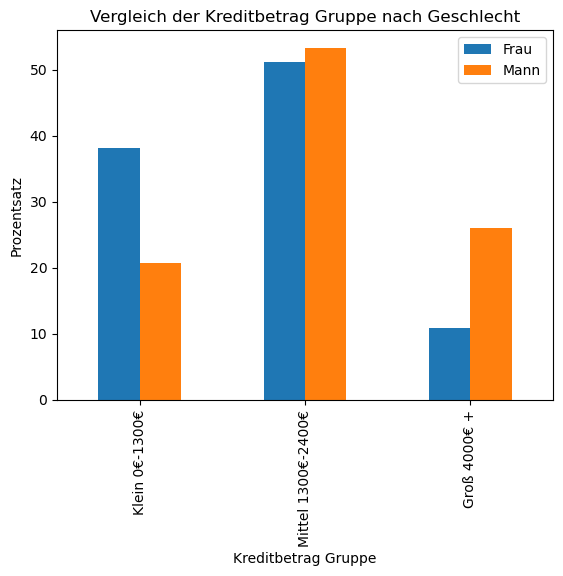

In [29]:
#  DataFrames basierend auf den Kategorien
df_fraukd = df_credit[df_credit['Geschlecht'] == 'Frau']
df_mannkd = df_credit[df_credit['Geschlecht'] == 'Mann']


# Kreuztabellen
fraukd = pd.crosstab(index=df_fraukd['Credit Amount Group'], columns='count', normalize='columns')*100
mannkd = pd.crosstab(index=df_mannkd['Credit Amount Group'], columns='count', normalize='columns')*100

# Kombinieren der DataFrames
dfkh = pd.concat([fraukd, mannkd], axis=1)
dfkh.columns = ['Frau', 'Mann']

# Balkendiagramm
dfkh.plot(kind='bar', stacked=False)

# Beschriften der Achsen und Diagramm Titel
plt.xlabel('Kreditbetrag Gruppe')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditbetrag Gruppe nach Geschlecht')

# Zeige das Diagramm an
plt.show()

In [30]:
# Kreditlaufzeit Verteilung Mann und Frau
########################################################


fraukdd  = pd.crosstab(index=df_fraukd['Kreditlaufzeit'], columns='count',normalize='columns')*100
mannkdd= pd.crosstab(index=df_mannkd['Kreditlaufzeit'], columns='count',normalize='columns')*100

print(fraukdd)
print(mannkdd)


geschkd = pd.crosstab(index=df_credit['Kreditlaufzeit'],columns=[df_credit['Geschlecht' ]],normalize='index')*100



col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     42.391304
Mittelfristig 12-36 Monate  54.347826
Langfristig 36 + Monate      3.260870
col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     35.242291
Mittelfristig 12-36 Monate  55.506608
Langfristig 36 + Monate      9.251101


Text(0.5, 1.0, 'Vergleich der Kreditlaufzeit nach Geschlecht')

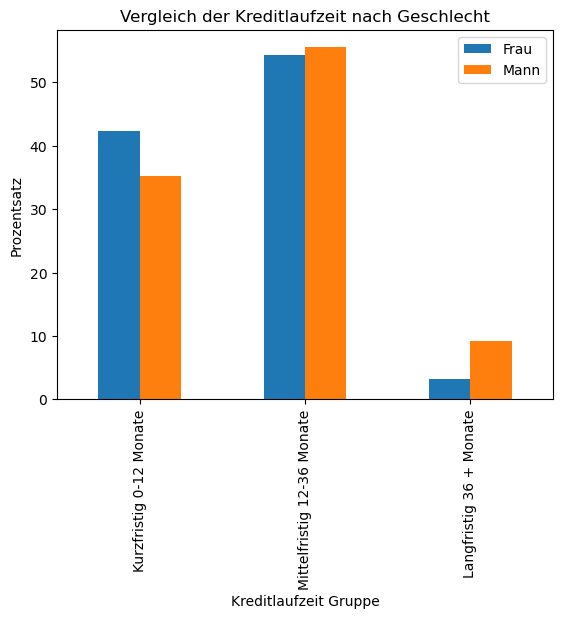

In [31]:

# DataFrames basierend auf den Kategorien
df_fraukd = df_credit[df_credit['Geschlecht'] == 'Frau']
df_mannkd = df_credit[df_credit['Geschlecht'] == 'Mann']

# Kreuztabellen
fraukdd = pd.crosstab(index=df_fraukd['Kreditlaufzeit'], columns='count', normalize='columns')*100
mannkdd = pd.crosstab(index=df_mannkd['Kreditlaufzeit'], columns='count', normalize='columns')*100

# Kombinieren DataFrames
dfkl = pd.concat([fraukdd, mannkdd], axis=1)
dfkl.columns = ['Frau', 'Mann']

# Balkendiagramm
dfkl.plot(kind='bar', stacked=False)

# Beschriften Achsen und Diagramm Titel
plt.xlabel('Kreditlaufzeit Gruppe')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditlaufzeit nach Geschlecht')

In [32]:
# Kreditzweckübersicht 'Age Group' 
####################################################################

agep = pd.crosstab(index=df_credit['Purpose'],columns=[df_credit['Age Group' ]],normalize='index')*100


df_jung = df_credit[df_credit['Age Group'] == '0-25 Jahre Alt']
df_mittel = df_credit[df_credit['Age Group'] == '25-40 Jahre Alt']
df_alt = df_credit[df_credit['Age Group'] == '40-55 Jahre Alt']
df_salt = df_credit[df_credit['Age Group'] == '55 + Jahre Alt']

# 
age_jung  = pd.crosstab(index=df_jung['Purpose'], columns='count',normalize='columns')*100
age_mittel= pd.crosstab(index=df_mittel['Purpose'], columns='count',normalize='columns')*100
age_alt= pd.crosstab(index=df_alt['Purpose'], columns='count',normalize='columns')*100
age_salt= pd.crosstab(index=df_salt['Purpose'], columns='count',normalize='columns')*100

print(age_jung)
print(age_mittel)
print(age_alt)
print(age_salt)




col_0                count
Purpose                   
Andere           16.842105
Neuwagen          7.368421
Gebrauchtwagen   27.368421
Möbel            33.684211
Radio/TV          2.105263
Haushaltsgeräte   3.157895
Reparatur         3.684211
Urlaub            0.526316
Umschulung        5.263158
col_0                count
Purpose                   
Andere           23.977695
Neuwagen         10.223048
Gebrauchtwagen   16.914498
Möbel            27.137546
Radio/TV          0.929368
Haushaltsgeräte   1.301115
Reparatur         4.460967
Urlaub            1.301115
Umschulung       12.267658
Geschäft          1.486989
col_0                count
Purpose                   
Andere           26.865672
Neuwagen         12.437811
Gebrauchtwagen   17.412935
Möbel            25.373134
Radio/TV          0.995025
Haushaltsgeräte   2.985075
Reparatur         6.467662
Urlaub            0.497512
Umschulung        5.970149
Geschäft          0.995025
col_0                count
Purpose                   
A

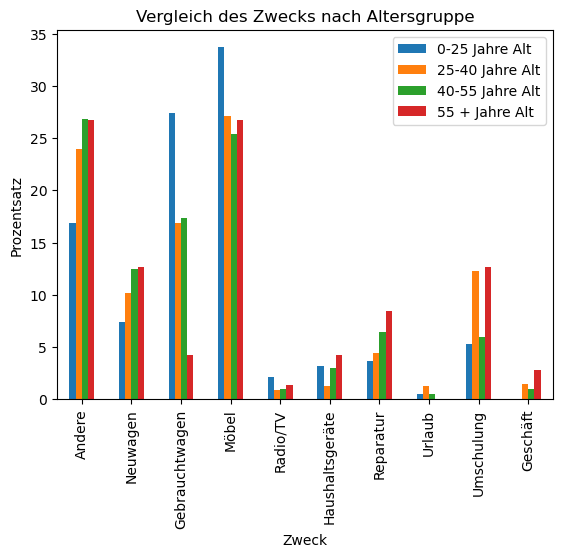

In [33]:
#'Vergleich des Zwecks nach Altersgruppe' 

df_jung = df_credit[df_credit['Age Group'] == '0-25 Jahre Alt']
df_mittel = df_credit[df_credit['Age Group'] == '25-40 Jahre Alt']
df_alt = df_credit[df_credit['Age Group'] == '40-55 Jahre Alt']
df_salt = df_credit[df_credit['Age Group'] == '55 + Jahre Alt']

# Erstellen DataFrame, der alle vier DataFrames zusammenfasst
dfaz = pd.concat([age_jung, age_mittel, age_alt, age_salt], axis=1)
dfaz.columns = ['0-25 Jahre Alt', '25-40 Jahre Alt', '40-55 Jahre Alt', '55 + Jahre Alt']
dfaz2 = pd.concat([age_alt, age_salt], axis=1)
dfaz2.columns = ['40-55 Jahre Alt', '55 + Jahre Alt']

# Balkendiagramm
dfaz.plot(kind='bar', stacked=False)

# Beschriften Achsen und Diagramm Titel
plt.xlabel('Zweck')
plt.ylabel('Prozentsatz')
plt.title('Vergleich des Zwecks nach Altersgruppe')

# Zeige das Diagramm an
plt.show()

In [34]:
# Auch bei der Kredithöhe Altersgruppe,
##########################################################################

ageka = pd.crosstab(index=df_credit['Credit Amount Group'],columns=[df_credit['Age Group']],normalize='index')*100

age_jungka  = pd.crosstab(index=df_jung['Credit Amount Group'], columns='count',normalize='columns')*100
age_mittelka= pd.crosstab(index=df_mittel['Credit Amount Group'], columns='count',normalize='columns')*100
age_altka= pd.crosstab(index=df_alt['Credit Amount Group'], columns='count',normalize='columns')*100
age_saltka= pd.crosstab(index=df_salt['Credit Amount Group'], columns='count',normalize='columns')*100




print(age_jungka)
print(age_mittelka)
print(age_altka)
print(age_saltka)



col_0                    count
Credit Amount Group           
Klein 0€-1300€       28.947368
Mittel 1300€-2400€   51.052632
Groß 4000€ +         20.000000
col_0                    count
Credit Amount Group           
Klein 0€-1300€       18.959108
Mittel 1300€-2400€   55.947955
Groß 4000€ +         25.092937
col_0                    count
Credit Amount Group           
Klein 0€-1300€       22.388060
Mittel 1300€-2400€   49.751244
Groß 4000€ +         27.860697
col_0                    count
Credit Amount Group           
Klein 0€-1300€       29.577465
Mittel 1300€-2400€   46.478873
Groß 4000€ +         23.943662


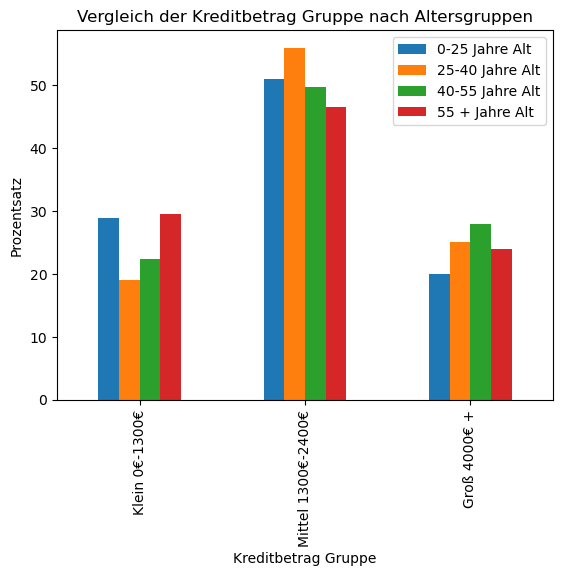

In [35]:
# DataFrames basierend auf den Altersgruppen
df_jung = df_credit[df_credit['Age Group'] == '0-25 Jahre Alt']
df_mittel = df_credit[df_credit['Age Group'] == '25-40 Jahre Alt']
df_alt = df_credit[df_credit['Age Group'] == '40-55 Jahre Alt']
df_salt = df_credit[df_credit['Age Group'] == '55 + Jahre Alt']


# Kreuztabellen
age_jungka = pd.crosstab(index=df_jung['Credit Amount Group'], columns='count', normalize='columns')*100
age_mittelka = pd.crosstab(index=df_mittel['Credit Amount Group'], columns='count', normalize='columns')*100
age_altka = pd.crosstab(index=df_alt['Credit Amount Group'], columns='count', normalize='columns')*100
age_saltka = pd.crosstab(index=df_salt['Credit Amount Group'], columns='count', normalize='columns')*100

# Kombiniere DataFrames
dfakh = pd.concat([age_jungka, age_mittelka, age_altka, age_saltka], axis=1)
dfakh.columns = ['0-25 Jahre Alt', '25-40 Jahre Alt', '40-55 Jahre Alt', '55 + Jahre Alt']

# Balkendiagramm
dfakh.plot(kind='bar', stacked=False)

# Beschriften Achsen und  Diagramm Titel
plt.xlabel('Kreditbetrag Gruppe')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditbetrag Gruppe nach Altersgruppen')

# Zeigen das Diagramm
plt.show()

In [36]:
# Kreditlaufzeit nach Altersgruppe
######################################################


agekl = pd.crosstab(index=df_credit['Kreditlaufzeit'],columns=[df_credit['Age Group']],normalize='index')*100


# 
age_jungkl  = pd.crosstab(index=df_jung['Kreditlaufzeit'], columns='count',normalize='columns')*100
age_mittelkl= pd.crosstab(index=df_mittel['Kreditlaufzeit'], columns='count',normalize='columns')*100
age_altkl= pd.crosstab(index=df_alt['Kreditlaufzeit'], columns='count',normalize='columns')*100
age_saltkl= pd.crosstab(index=df_salt['Kreditlaufzeit'], columns='count',normalize='columns')*100




print(age_jungkl)
print(age_mittelkl)
print(age_altkl)
print(age_saltkl)



col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     35.263158
Mittelfristig 12-36 Monate  55.789474
Langfristig 36 + Monate      8.947368
col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     32.899628
Mittelfristig 12-36 Monate  58.921933
Langfristig 36 + Monate      8.178439
col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     41.791045
Mittelfristig 12-36 Monate  49.253731
Langfristig 36 + Monate      8.955224
col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     43.661972
Mittelfristig 12-36 Monate  45.070423
Langfristig 36 + Monate     11.267606


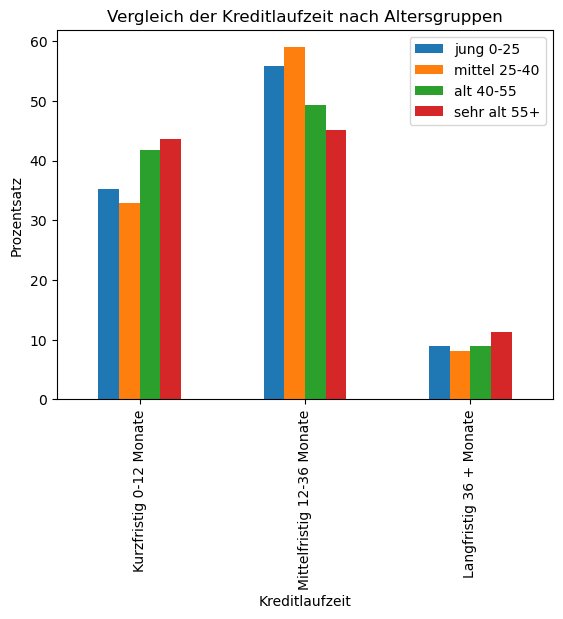

In [37]:
# DataFrames basierend auf den Altersgruppen
df_jung = df_credit[df_credit['Age Group'] == '0-25 Jahre Alt']
df_mittel = df_credit[df_credit['Age Group'] == '25-40 Jahre Alt']
df_alt = df_credit[df_credit['Age Group'] == '40-55 Jahre Alt']
df_salt = df_credit[df_credit['Age Group'] == '55 + Jahre Alt']

# Kreuztabellen
age_jungkl = pd.crosstab(index=df_jung['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_mittelkl = pd.crosstab(index=df_mittel['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_altkl = pd.crosstab(index=df_alt['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_saltkl = pd.crosstab(index=df_salt['Kreditlaufzeit'], columns='count', normalize='columns')*100

# Kombinieren DataFrames
dfakl = pd.concat([age_jungkl, age_mittelkl, age_altkl, age_saltkl], axis=1)
dfakl.columns = ['jung 0-25', 'mittel 25-40', 'alt 40-55', 'sehr alt 55+']

# Balkendiagramm
dfakl.plot(kind='bar', stacked=False)

# Beschriften Achsen und Diagramm Titel
plt.xlabel('Kreditlaufzeit')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditlaufzeit nach Altersgruppen')

# Zeigen das Diagramm
plt.show()

In [38]:
# Kredithöhe Verteilung Gastarbeitern zu nicht GA
#######################################################


df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']


# 
gast  = pd.crosstab(index=df_gast['Credit Amount Group'], columns='count',normalize='columns')*100
nichtgast= pd.crosstab(index=df_nichtgast['Credit Amount Group'], columns='count',normalize='columns')*100


print(gast)
print(nichtgast)



col_0                    count
Credit Amount Group           
Klein 0€-1300€       24.324324
Mittel 1300€-2400€   64.864865
Groß 4000€ +         10.810811
col_0                    count
Credit Amount Group           
Klein 0€-1300€       22.222222
Mittel 1300€-2400€   52.647975
Groß 4000€ +         25.129803


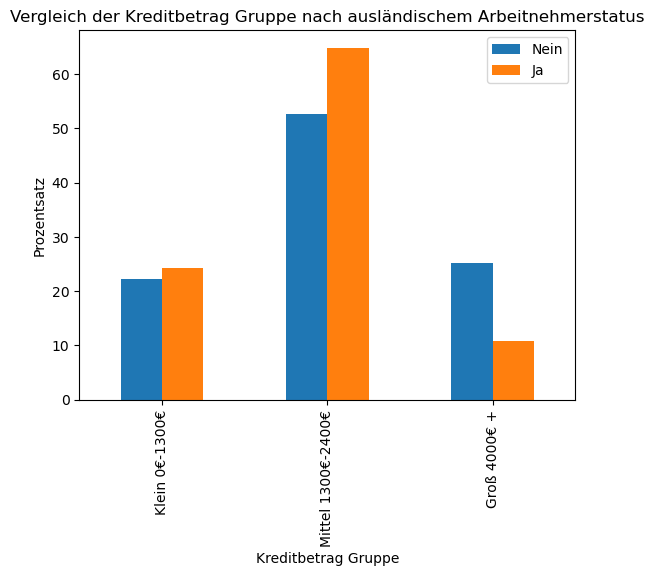

In [39]:
# DataFrames basierend auf den Kategorien
df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']

# Kreuztabellen
gast = pd.crosstab(index=df_gast['Credit Amount Group'], columns='count', normalize='columns')*100
nichtgast = pd.crosstab(index=df_nichtgast['Credit Amount Group'], columns='count', normalize='columns')*100

# Kombinieren  DataFrames
dfgakh = pd.concat([nichtgast,gast], axis=1)
dfgakh.columns = ['Nein','Ja']

# Balkendiagramm
dfgakh.plot(kind='bar', stacked=False)

# Beschriften Achsen Diagramm Titel
plt.xlabel('Kreditbetrag Gruppe')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditbetrag Gruppe nach ausländischem Arbeitnehmerstatus')

# Diagramm 
plt.show()

In [40]:
# Kreditlaufzeit Verteilung, Gastarbeitern
##########################################################################



df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']


# 
gastkl  = pd.crosstab(index=df_gast['Kreditlaufzeit'], columns='count',normalize='columns')*100
nichtgastkl= pd.crosstab(index=df_nichtgast['Kreditlaufzeit'], columns='count',normalize='columns')*100


print(gastkl)
print(nichtgastkl)

gastklp = pd.crosstab(index=df_credit['Kreditlaufzeit'],columns=[df_credit['Foreign Worker' ]],normalize='index')*100




col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     70.270270
Mittelfristig 12-36 Monate  27.027027
Langfristig 36 + Monate      2.702703
col_0                           count
Kreditlaufzeit                       
Kurzfristig 0-12 Monate     34.579439
Mittelfristig 12-36 Monate  56.490135
Langfristig 36 + Monate      8.930426


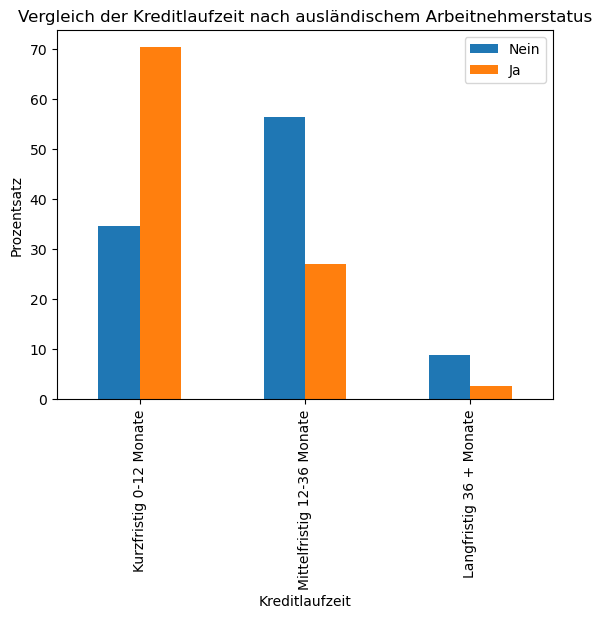

In [41]:
# DataFrames basierend auf den Kategorien
df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']

# Kreuztabellen
gastkl = pd.crosstab(index=df_gast['Kreditlaufzeit'], columns='count', normalize='columns')*100
nichtgastkl = pd.crosstab(index=df_nichtgast['Kreditlaufzeit'], columns='count', normalize='columns')*100

# Kombinieren  DataFrames
dfgakl = pd.concat([nichtgastkl,gastkl], axis=1)
dfgakl.columns = ['Nein','Ja']

# Balkendiagramm
dfgakl.plot(kind='bar', stacked=False)

# Beschriften und Titel
plt.xlabel('Kreditlaufzeit')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditlaufzeit nach ausländischem Arbeitnehmerstatus')

# Diagramm 
plt.show()

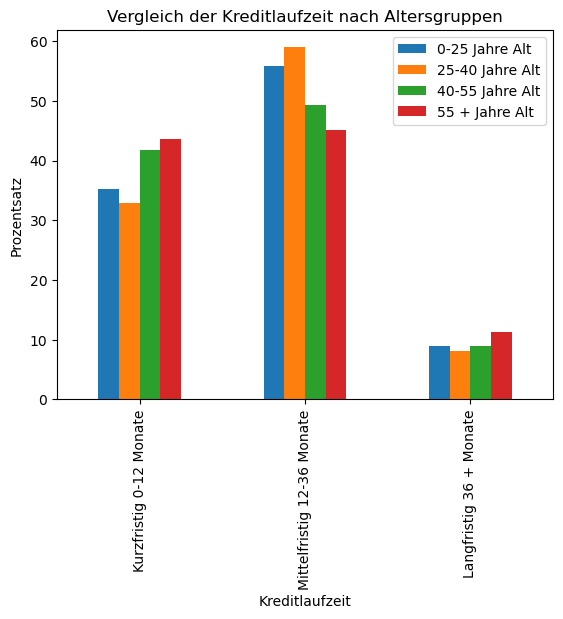

In [42]:
# DataFrames basierend auf den Altersgruppen
df_jung = df_credit[df_credit['Age Group'] == '0-25 Jahre Alt']
df_mittel = df_credit[df_credit['Age Group'] == '25-40 Jahre Alt']
df_alt = df_credit[df_credit['Age Group'] == '40-55 Jahre Alt']
df_salt = df_credit[df_credit['Age Group'] == '55 + Jahre Alt']

# Kreuztabellen
age_jungkl = pd.crosstab(index=df_jung['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_mittelkl = pd.crosstab(index=df_mittel['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_altkl = pd.crosstab(index=df_alt['Kreditlaufzeit'], columns='count', normalize='columns')*100
age_saltkl = pd.crosstab(index=df_salt['Kreditlaufzeit'], columns='count', normalize='columns')*100

# Kombinieren DataFrames
dfakl = pd.concat([age_jungkl, age_mittelkl, age_altkl, age_saltkl], axis=1)
dfakl.columns = ['0-25 Jahre Alt', '25-40 Jahre Alt', '40-55 Jahre Alt', '55 + Jahre Alt']

# Balkendiagramm
dfakl.plot(kind='bar', stacked=False)

# Beschriften und Titel
plt.xlabel('Kreditlaufzeit')
plt.ylabel('Prozentsatz')
plt.title('Vergleich der Kreditlaufzeit nach Altersgruppen')

# Zeigen 
plt.show()

In [43]:
#Kreditzweck nach Fremdarbeiter
############################################################################


df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']


# 
gast  = pd.crosstab(index=df_gast['Purpose'], columns='count',normalize='columns')*100
nichtgast= pd.crosstab(index=df_nichtgast['Purpose'], columns='count',normalize='columns')*100


print(gast)
print(nichtgast)



col_0                count
Purpose                   
Andere           56.756757
Neuwagen          5.405405
Gebrauchtwagen   18.918919
Möbel            13.513514
Haushaltsgeräte   2.702703
Geschäft          2.702703
col_0                count
Purpose                   
Andere           22.118380
Neuwagen         10.488058
Gebrauchtwagen   18.068536
Möbel            28.556594
Radio/TV          1.246106
Haushaltsgeräte   2.180685
Reparatur         5.192108
Urlaub            0.934579
Umschulung       10.072690
Geschäft          1.142264


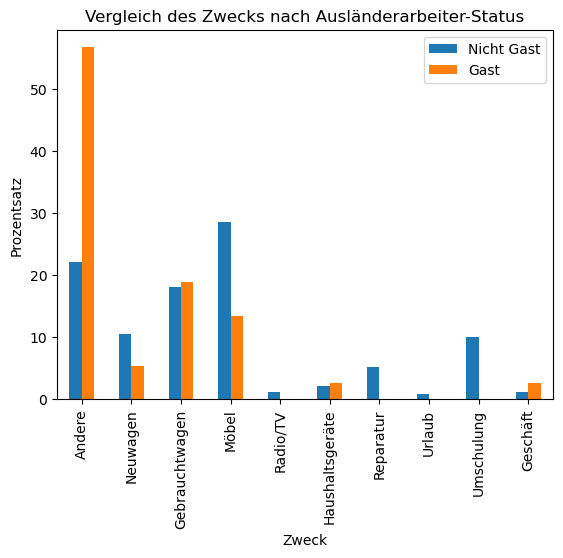

In [44]:
# DataFrames basierend auf den Kategorien
df_gast = df_credit[df_credit['Foreign Worker'] == 'Yes']
df_nichtgast = df_credit[df_credit['Foreign Worker'] == 'No']

# Kreuztabellen
gast = pd.crosstab(index=df_gast['Purpose'], columns='count', normalize='columns')*100
nichtgast = pd.crosstab(index=df_nichtgast['Purpose'], columns='count', normalize='columns')*100

# Kombinieren DataFrames
dfgaz = pd.concat([nichtgast,gast], axis=1)
dfgaz.columns = ['Nicht Gast','Gast']

# Balkendiagramm
dfgaz.plot(kind='bar', stacked=False)

# Beschriften und Titel
plt.xlabel('Zweck')
plt.ylabel('Prozentsatz')
plt.title('Vergleich des Zwecks nach Ausländerarbeiter-Status')

# Zeigen
plt.show()

In [86]:
df_fraukd = df_credit[df_credit['Geschlecht'] == 'Frau']
df_fraukd = df_fraukd[df_fraukd['Creditability'] == 1]
#df_fraukd.describe()# Keditvolumen von Risikoarmen Krediten  mit Glaubwürdigkeit im Schnitt bei 1473 € 

df_fraukd['Credit Amount'].median()

# oder:
# df_fraukd = df_credit[(df_credit['Geschlecht'] == 'Frau') & (df_credit['Creditability'] == 1)]
 # df_fraukd['Credit Amount'].median()


1473.0

In [87]:
df_forwo = df_credit[df_credit['Foreign Worker'] == 'Yes']

df_forwo = df_forwo[df_forwo['Creditability'] == 1]
df_forwo.describe()# Keditvolumen von Risikoarmen Krediten  mit Glaubwürdigkeit im Schnitt bei 1597 € 
df_forwo['Credit Amount'].median()

1597.0

In [88]:
df_altv = df_credit[df_credit['Age (years)'] > 40]

df_altv = df_altv[df_altv['Creditability'] == 1]
df_altv.describe()# Keditvolumen von Risikoarmen Krediten  mit Glaubwürdigkeit im Schnitt bei 1998 € 
df_altv['Credit Amount'].median()
#len(df_altv)

1998.0

In [89]:

df_alle = df_credit[df_credit['Creditability'] == 1]
df_alle.describe()# Keditvolumen von Risikoarmen Krediten  mit Glaubwürdigkeit im Schnitt bei 1998 € 
df_alle['Credit Amount'].median()


2244.0

In [90]:
df_alles = df_credit[df_credit['Foreign Worker'] == 'No']

df_alles = df_alles[df_alles['Creditability'] == 1]
df_alles = df_alles[df_alles['Geschlecht'] == 'Mann']
df_alles = df_alles[df_alles['Age (years)'] < 40]
df_alles.describe()# Keditvolumen von Risikoarmen Krediten  mit Glaubwürdigkeit im Schnitt bei 1597 € 
df_alles['Credit Amount'].median()

2573.5

<Axes: xlabel='Purpose'>

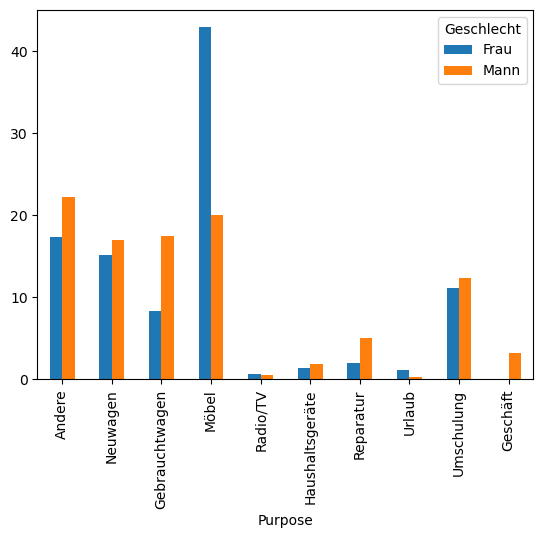

In [50]:
# Erstellen Sie eine Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Berechnen Sie die Prozentsätze
percentagegesch = cross_tab / cross_tab.sum() * 100

percentagegesch.plot(kind='bar')

<Axes: xlabel='Purpose'>

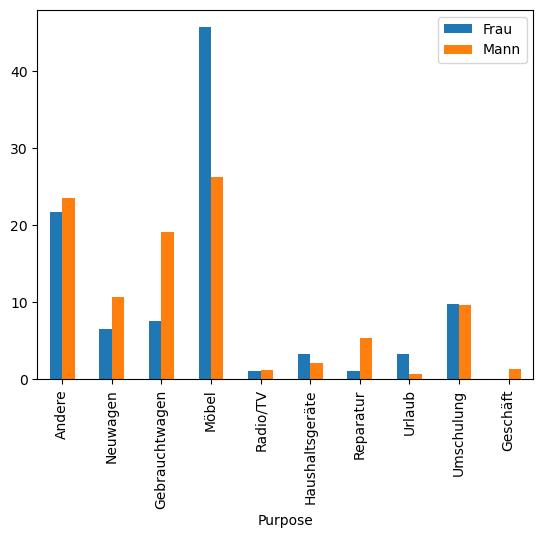

In [51]:
dfz.plot(kind='bar', stacked=False)

In [52]:
# Kreditvolumen

# Filtern  DataFrame auf Frauen
df_credit_frauen = df_credit[df_credit['Geschlecht'] == 'Frau']

# Kreuztabelle nur für Frauen
cross_tab_frauen = pd.crosstab(index=df_credit_frauen['Purpose'], columns=df_credit_frauen['Geschlecht'], values=df_credit_frauen['Credit Amount'], aggfunc='sum')

# Prozentsätze
percentage_frauen = cross_tab_frauen / cross_tab_frauen.sum() * 100





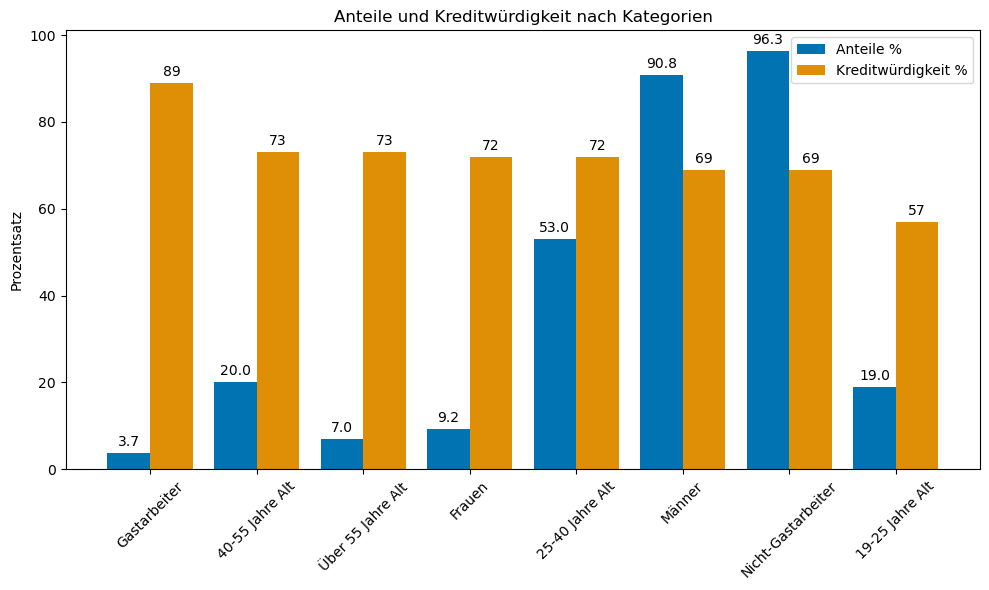

In [53]:
############## Anteile und Kreditwürdigkeit nach Kategorien #########################

import seaborn as sns

# Setze Farbschema auf "colorblind"
sns.set_palette('colorblind')


import matplotlib.pyplot as plt
import numpy as np

# Daten
categories = ['Männer', 'Frauen', 'Gastarbeiter', 'Nicht-Gastarbeiter', '19-25 Jahre Alt', '25-40 Jahre Alt', '40-55 Jahre Alt', 'Über 55 Jahre Alt']
percentages = [90.8, 9.2, 3.7, 96.3, 19, 53, 20, 7]
creditability = [69, 72, 89, 69, 57, 72, 73, 73]

# Sortiere die Daten nach Kreditwürdigkeit
sorted_indices = np.argsort(-np.array(creditability))  # Verwende creditability für absteigende Sortierung
categories = [categories[i] for i in sorted_indices]
percentages = [percentages[i] for i in sorted_indices]
creditability = [creditability[i] for i in sorted_indices]

x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))  # Vergrößere die Figur
rects1 = ax.bar(x - 0.2, percentages, 0.4, label='Anteile %')
rects2 = ax.bar(x + 0.2, creditability, 0.4, label='Kreditwürdigkeit %')

# Fügen Werte auf den Balken hinzu
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 punkte vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Prozentsatz')
ax.set_title('Anteile und Kreditwürdigkeit nach Kategorien')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)  # Drehen x-Achsenbeschriftungen
ax.legend()

fig.tight_layout()

plt.show()



In [54]:
########################## Geschlecht ######################################

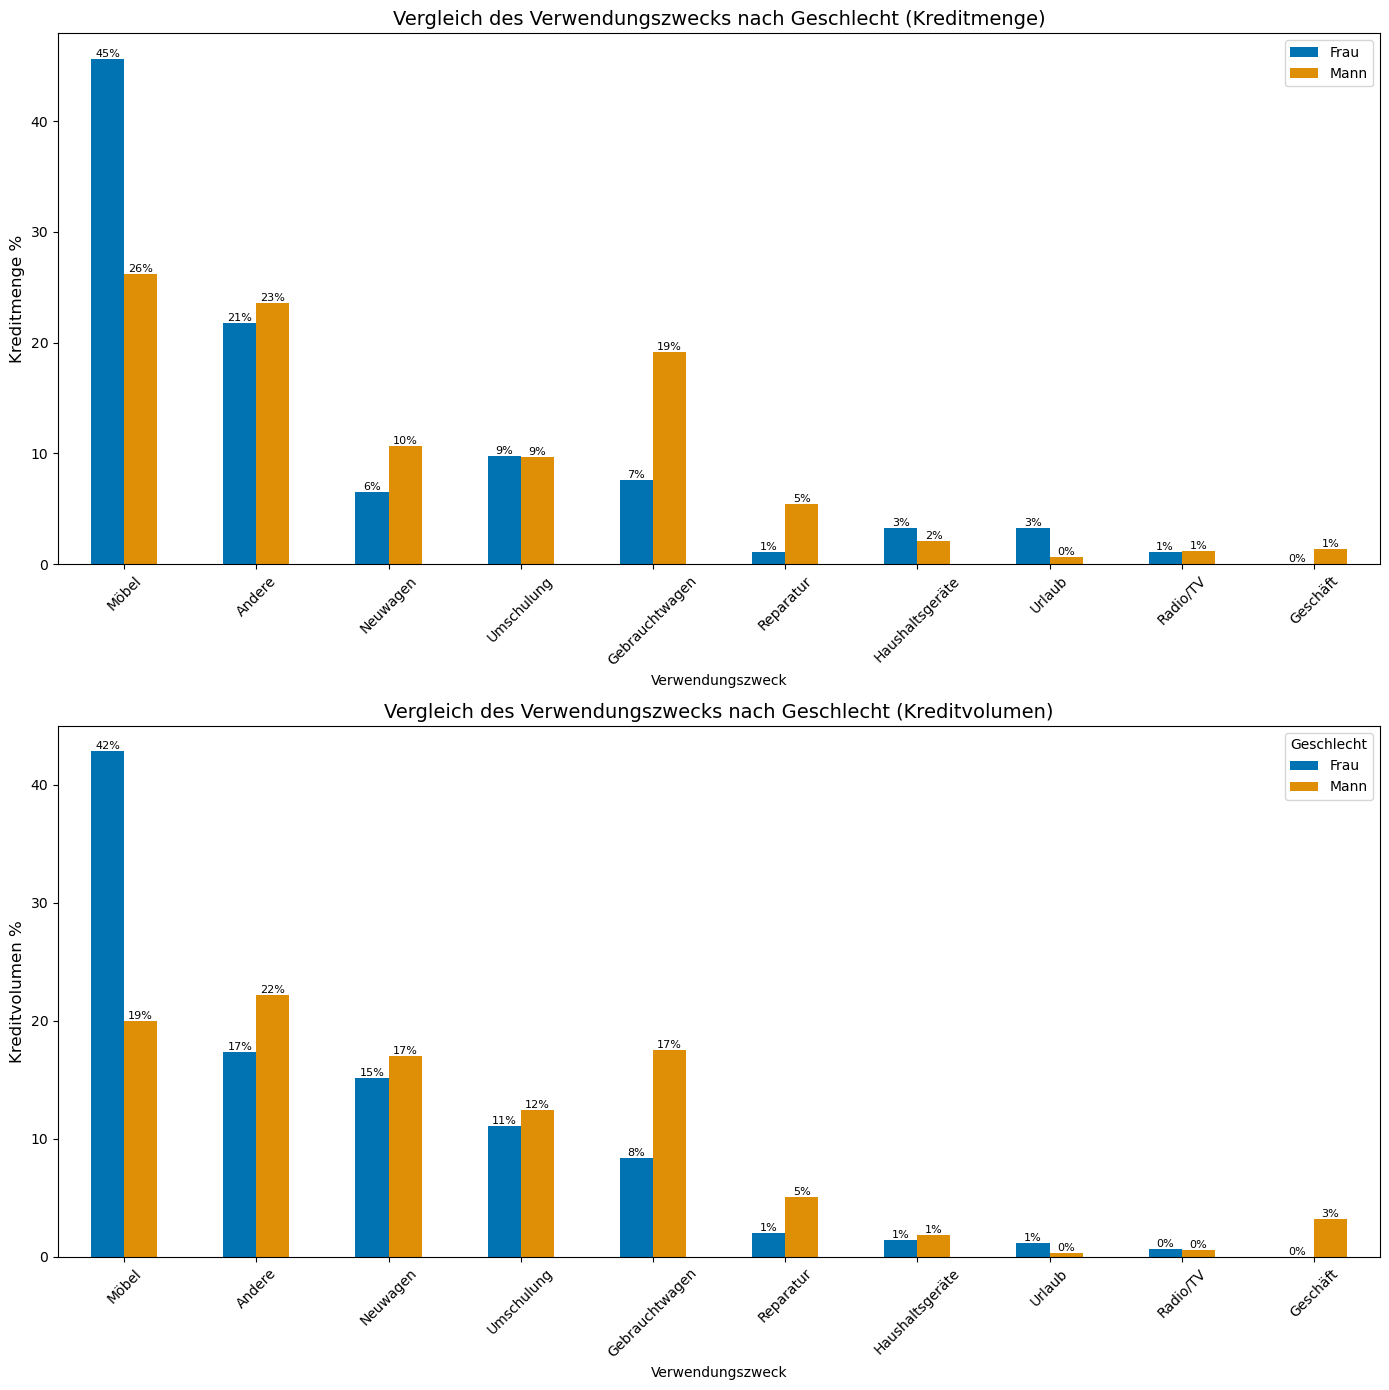

In [55]:

# Setze Farbschema auf "colorblind"
sns.set_palette('colorblind')

fig, axs = plt.subplots(2,figsize=(14,14))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Sortiere  Daten nach den Werten der Frau absteigend
cross_tab = cross_tab.sort_values(by='Frau', ascending=False)

# Prozentsätze
percentagegesch = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegesch.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

# Sortieren dfz in der gleichen Reihenfolge wie cross_tab
dfz = dfz.loc[cross_tab.index]

# Plot für dfz
bars = dfz.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich des Verwendungszwecks nach Geschlecht (Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Verwendungszweck')  # Ändern Beschriftung der x-Achse
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich des Verwendungszwecks nach Geschlecht (Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Verwendungszweck')  # Ändern Beschriftung der x-Achse
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

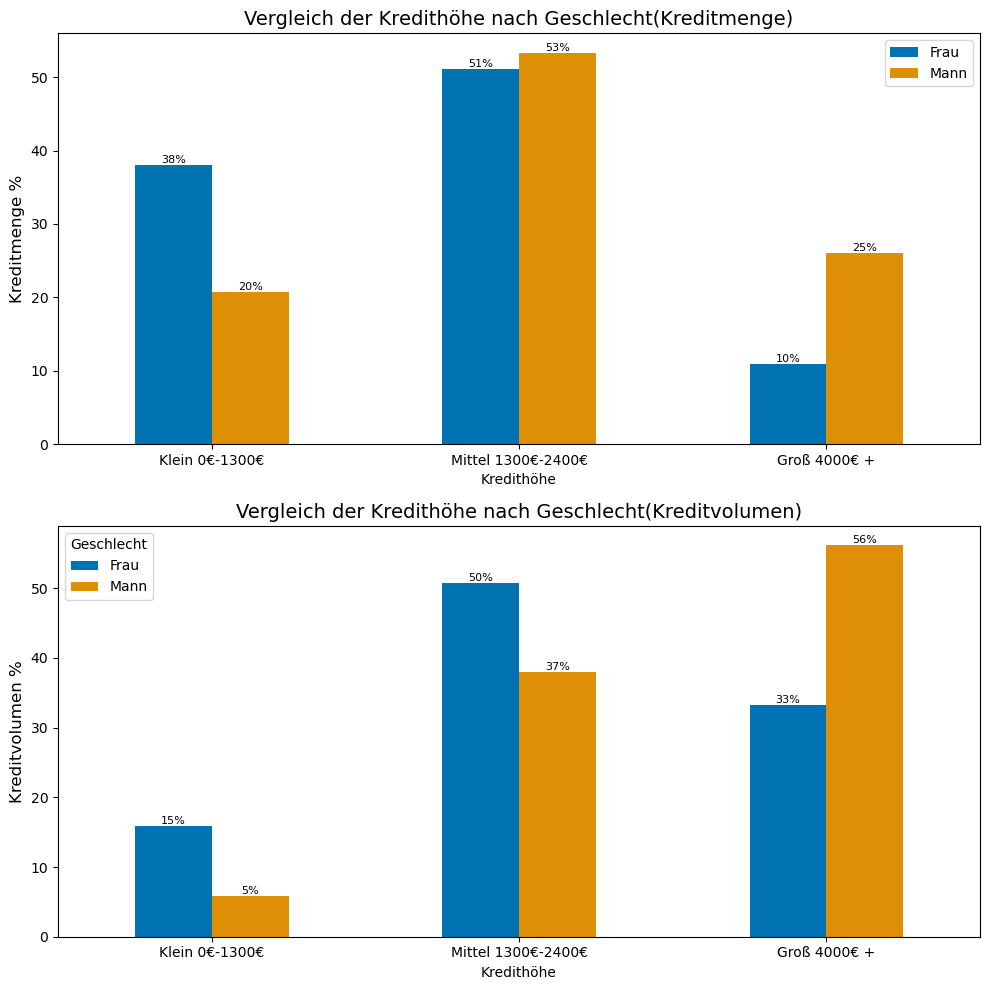

In [56]:


# Setzen Farbschema auf "colorblind"
sns.set_palette('colorblind')

fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')

# Sortiere Daten nach den Werten der Frau absteigend
#cross_tab = cross_tab.sort_values(by='Frau', ascending=False)

# Berechne die Prozentsätze
percentagegesch3 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegesch3.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

# Sortieren dfz in der gleichen Reihenfolge wie cross_tab
#dfz = dfkh.loc[cross_tab.index]

# Plot für dfz
bars = dfkh.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kredithöhe nach Geschlecht(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kredithöhe')  # Ändern Sie die Beschriftung der x-Achse
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kredithöhe nach Geschlecht(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kredithöhe')  # Ändern Sie die Beschriftung der x-Achse
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

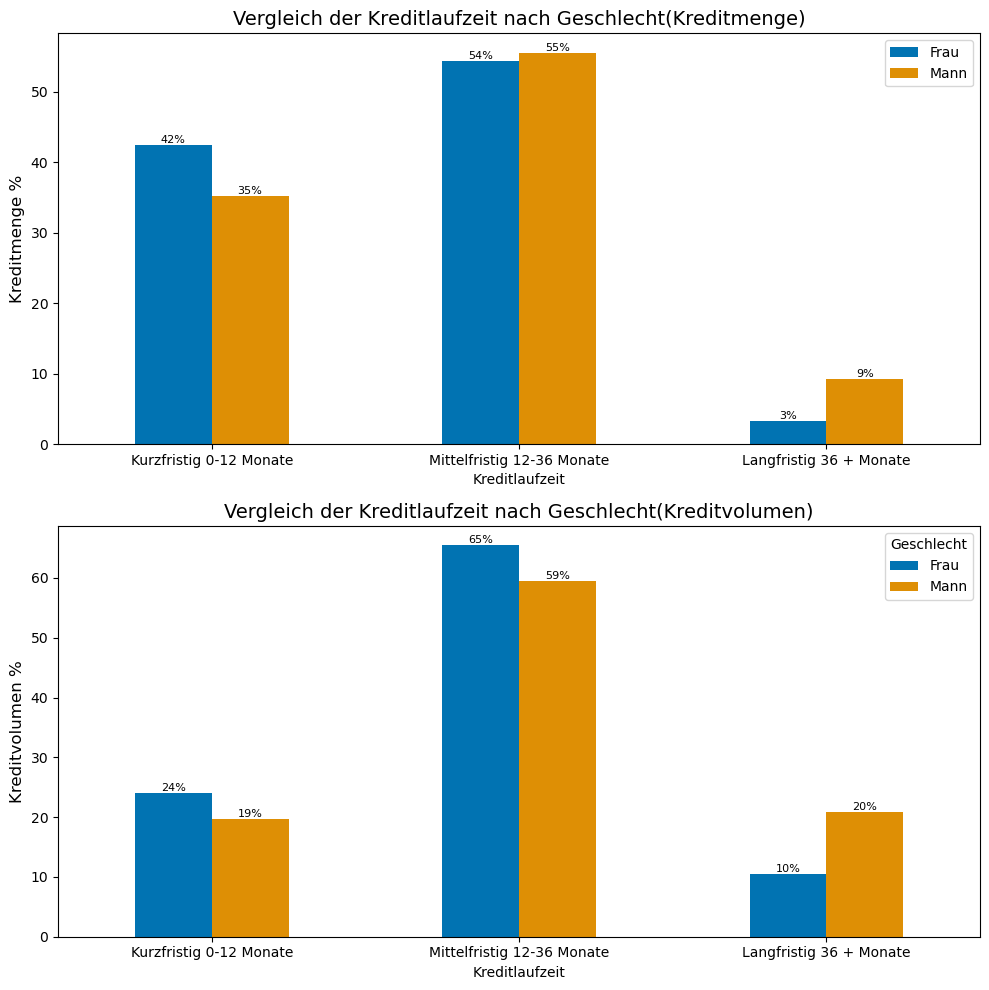

In [57]:

# Farbschema auf "colorblind"
sns.set_palette('colorblind')

fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Geschlecht'], values=df_credit['Credit Amount'], aggfunc='sum')



# Prozentsätze
percentagegesch2 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegesch2.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)


bars = dfkl.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kreditlaufzeit nach Geschlecht(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kreditlaufzeit')  # Änder Beschriftung der x-Achse
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kreditlaufzeit nach Geschlecht(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kreditlaufzeit')  # Änder Beschriftung der x-Achse
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [58]:
########################## Gastarbeiter ######################################

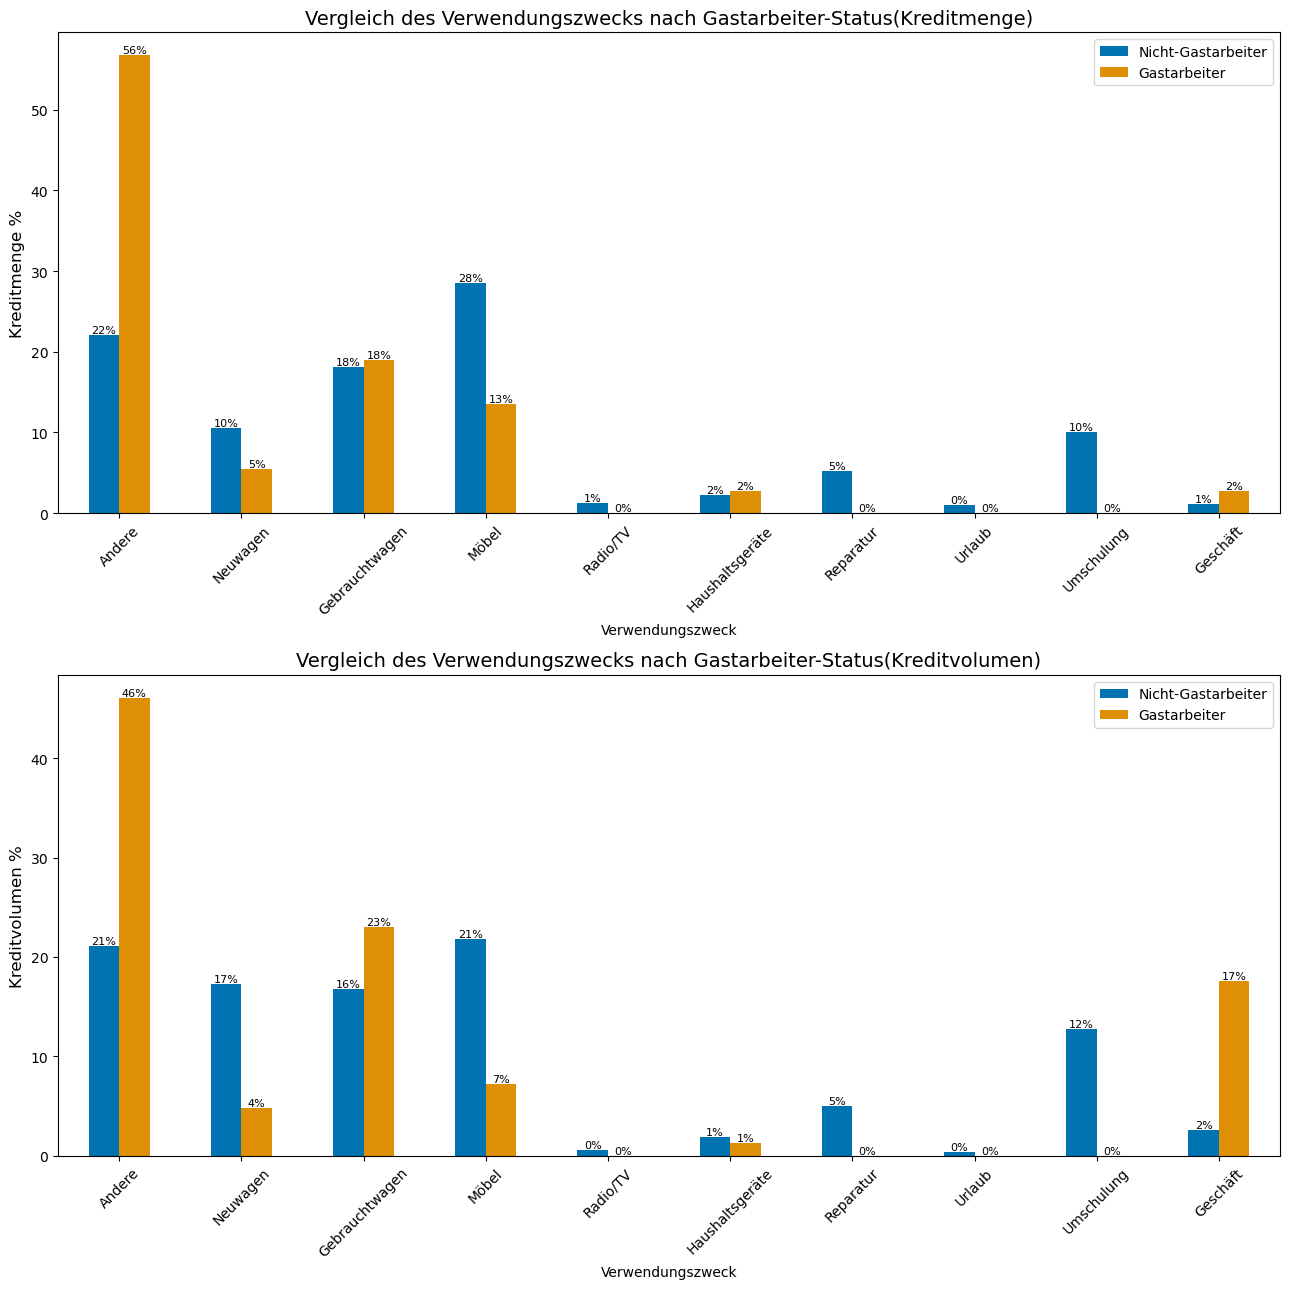

In [59]:

# Farbschema auf "colorblind"
sns.set_palette('colorblind')

fig, axs = plt.subplots(2,figsize=(13,13))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')

# Änder Reihenfolge der Spalten
cross_tab = cross_tab[['No','Yes']]

# Prozentsätze
percentagegeschga1 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschga1.plot(kind='bar', ax=axs[1])#, color=['#1f77b4', '#ff7f0e']) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

# Plot für dfz
bars = dfgaz.plot(kind='bar', stacked=False, ax=axs[0])#, color=['#1f77b4','#ff7f0e'])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich des Verwendungszwecks nach Gastarbeiter-Status(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Verwendungszweck')  # Änder Beschriftung der x-Achse
axs[0].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich des Verwendungszwecks nach Gastarbeiter-Status(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Verwendungszweck')  # Ändern Beschriftung der x-Achse
axs[1].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

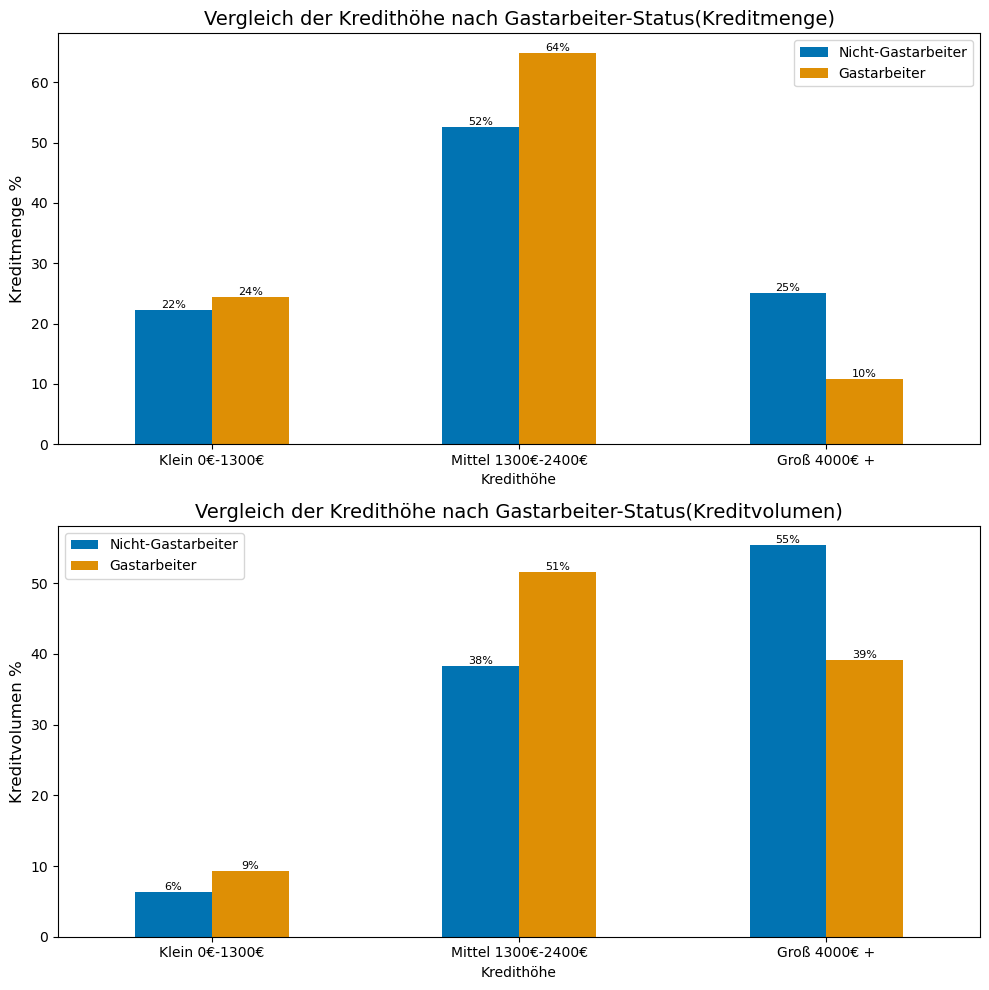

In [60]:


# Farbschema auf "colorblind"
sns.set_palette('colorblind')


fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')



# Ändern Reihenfolge der Spalten
cross_tab = cross_tab[['No','Yes']]

# Prozentsätze
percentagegeschga2 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschga2.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)



# Plot für dfz
bars = dfgakh.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kredithöhe nach Gastarbeiter-Status(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kredithöhe')  # Änder Beschriftung der x-Achse
axs[0].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kredithöhe nach Gastarbeiter-Status(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kredithöhe')  # Ändern Beschriftung der x-Achse
axs[1].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

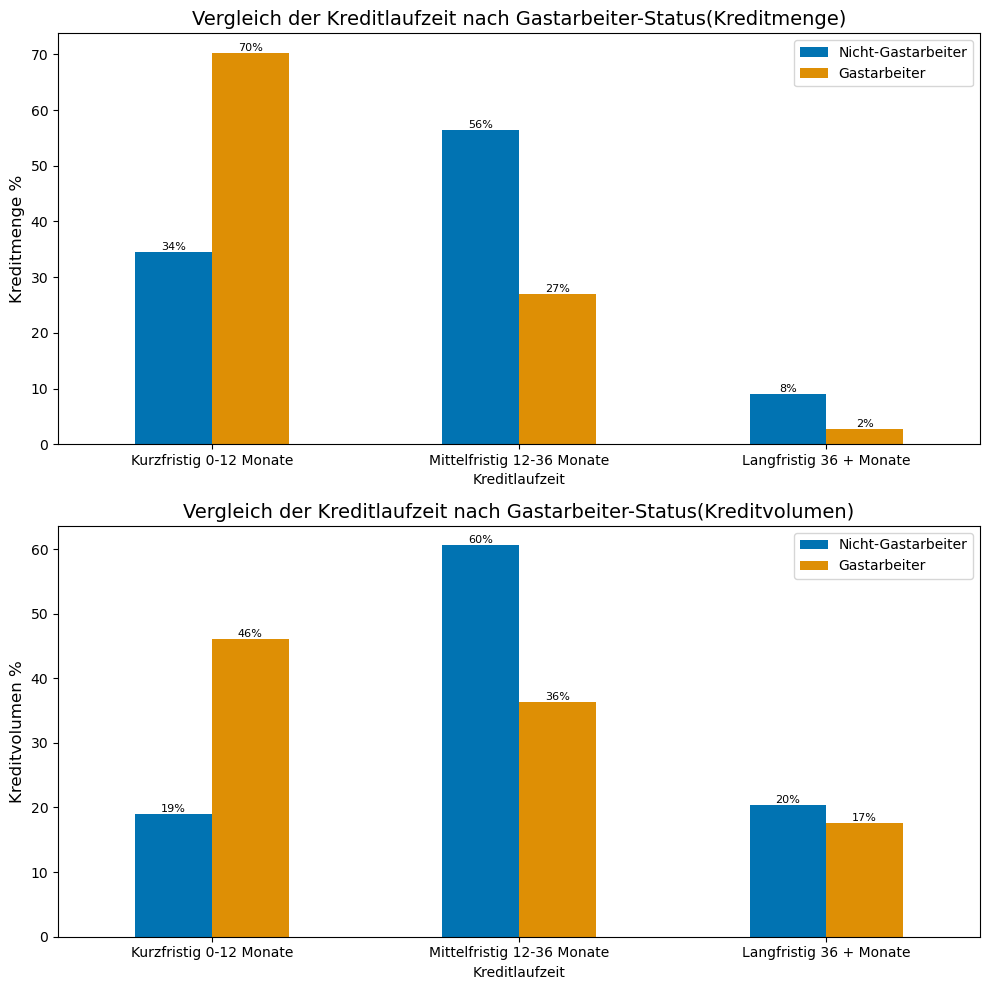

In [61]:


# Farbschema auf "colorblind"
sns.set_palette('colorblind')



fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Foreign Worker'], values=df_credit['Credit Amount'], aggfunc='sum')



# Ändern Reihenfolge der Spalten
cross_tab = cross_tab[['No','Yes']]

# Prozentsätze
percentagegeschga31 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschga31.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)




bars = dfgakl.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kreditlaufzeit nach Gastarbeiter-Status(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kreditlaufzeit')  # Ändern Beschriftung der x-Achse
axs[0].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kreditlaufzeit nach Gastarbeiter-Status(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kreditlaufzeit')  # Ändern Beschriftung der x-Achse
axs[1].legend(["Nicht-Gastarbeiter","Gastarbeiter"])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [62]:
########################## Altersgruppen ##############################

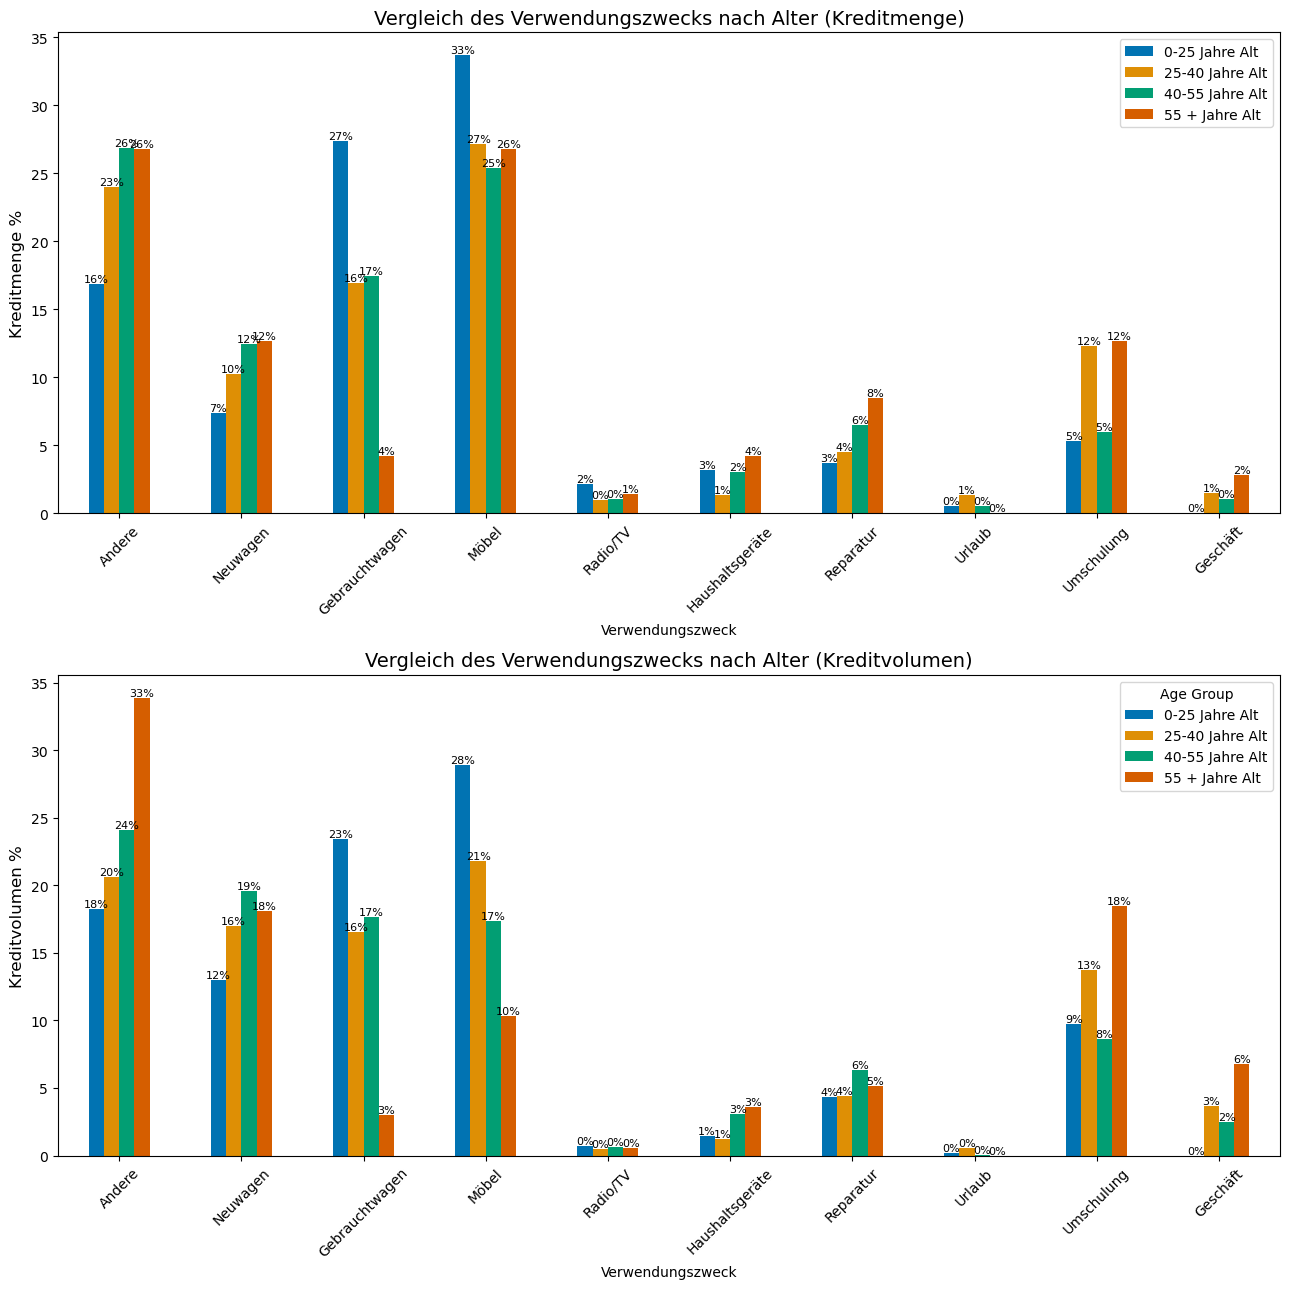

In [63]:


# Farbschema auf "colorblind"
sns.set_palette('colorblind')



fig, axs = plt.subplots(2,figsize=(13,13))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Purpose'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')



# Prozentsätze
percentagegeschag1 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschag1.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)



# Plot für dfz
bars = dfaz.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich des Verwendungszwecks nach Alter (Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Verwendungszweck')
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich des Verwendungszwecks nach Alter (Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Verwendungszweck')
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()


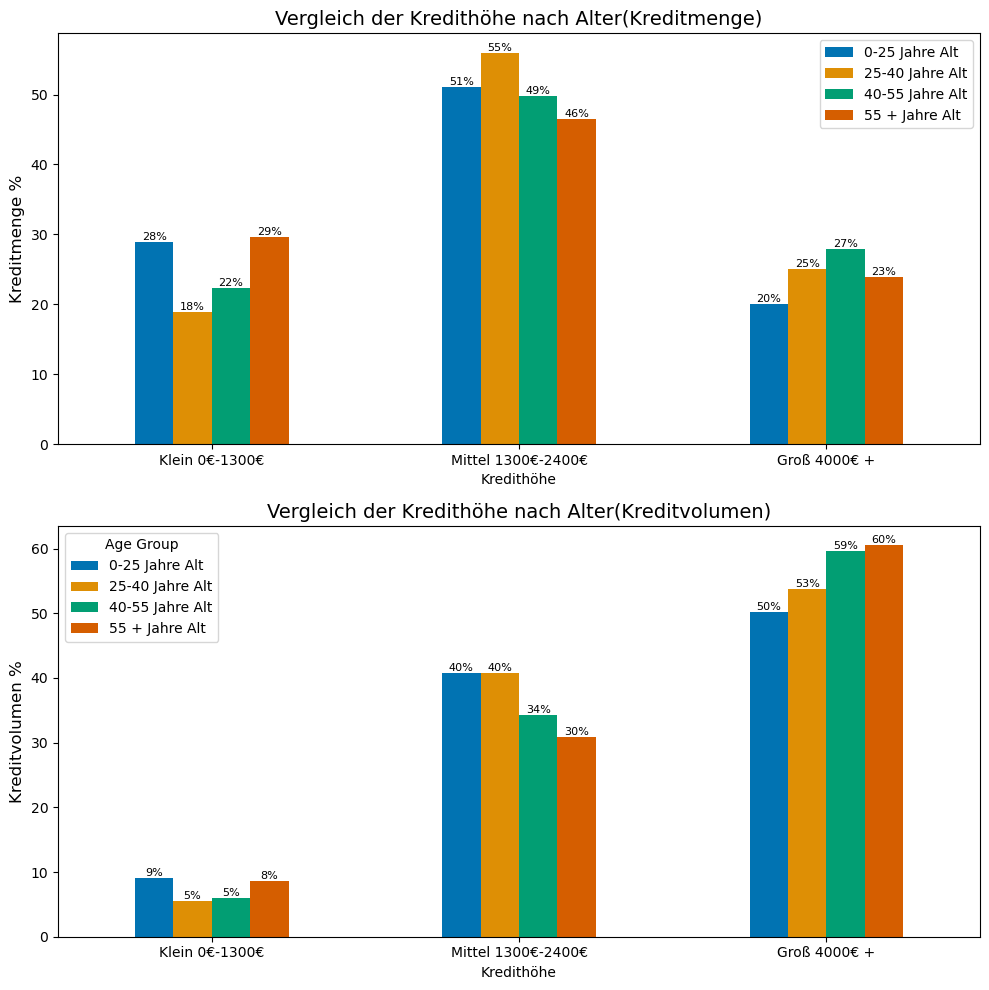

In [64]:


# Farbschema auf "colorblind"
sns.set_palette('colorblind')


fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Credit Amount Group'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')



# Prozentsätze
percentagegeschag2 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschag2.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)



# Plot für dfz
bars = dfakh.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kredithöhe nach Alter(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kredithöhe')  
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kredithöhe nach Alter(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kredithöhe')  
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

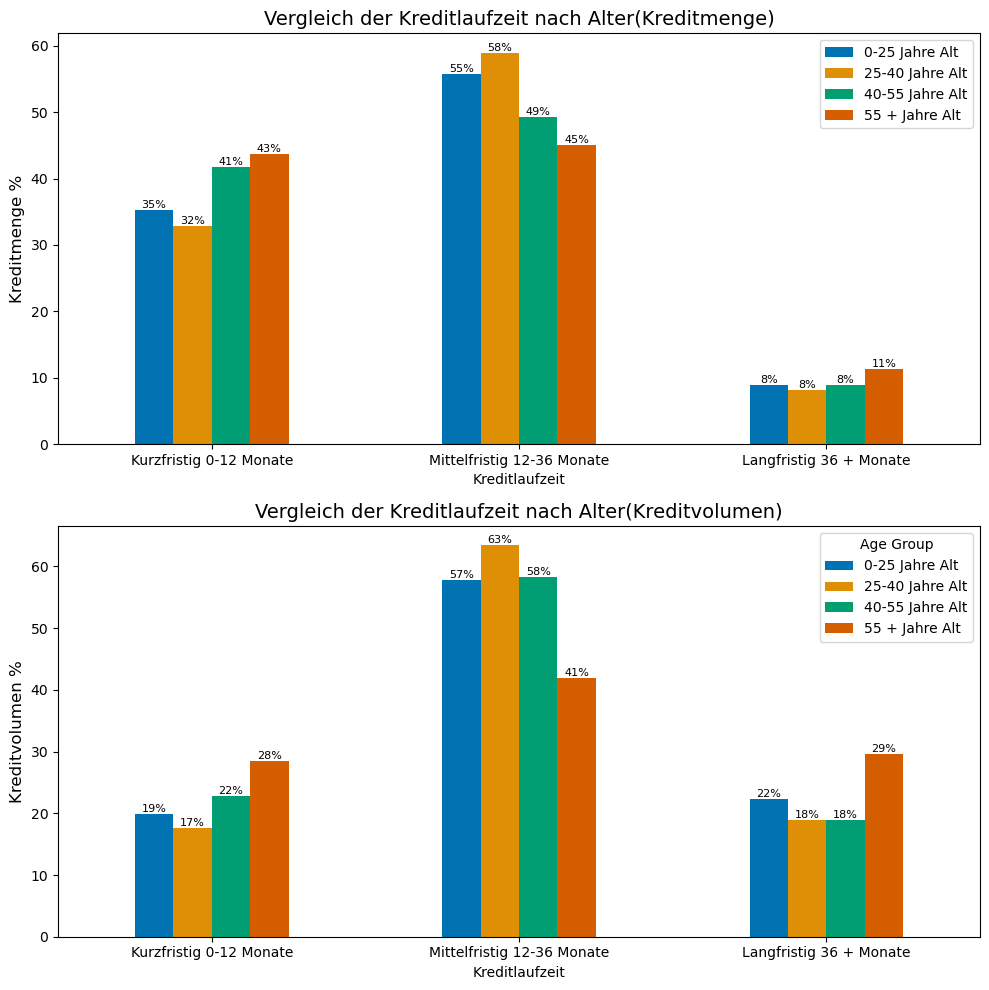

In [65]:


# Farbschema auf "colorblind"
sns.set_palette('colorblind')

fig, axs = plt.subplots(2,figsize=(10,10))

# Kreuztabelle
cross_tab = pd.crosstab(index=df_credit['Kreditlaufzeit'], columns=df_credit['Age Group'], values=df_credit['Credit Amount'], aggfunc='sum')



#Prozentsätze
percentagegeschag3 = cross_tab / cross_tab.sum() * 100

# Plot für percentagegesch
bars = percentagegeschag3.plot(kind='bar', ax=axs[1]) 

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)



# Plot für dfz
bars = dfakl.plot(kind='bar', stacked=False, ax=axs[0])

# Hinzufügen von Werten auf den Balken
for rect in bars.patches:
    height = rect.get_height()
    axs[0].text(rect.get_x() + rect.get_width() / 2, height, str(int(height)) + '%', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Kreditmenge %', fontsize=12)
axs[0].set_title('Vergleich der Kreditlaufzeit nach Alter(Kreditmenge)', fontsize=14,)
axs[0].set_xlabel('Kreditlaufzeit') 
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=0)

axs[1].set_ylabel('Kreditvolumen %', fontsize=12)
axs[1].set_title('Vergleich der Kreditlaufzeit nach Alter(Kreditvolumen)', fontsize=14,)
axs[1].set_xlabel('Kreditlaufzeit') 
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()